In [905]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [906]:
df = pd.read_csv('/Users/egorkovalev/Python_party/Update_Skills/sleep_health_and_lifestyle_dataset.csv')

### *Information about data*

In [907]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [908]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [909]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [910]:
df.duplicated().sum()

0

In [911]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [912]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [913]:
df.fillna('None', inplace=True)

In [914]:
res1 = ', '.join(df.Occupation.unique())
res2 = ', '.join(df['BMI Category'].unique())
res3 = ', '.join(df['Sleep Disorder'].unique())

In [915]:
print('Unique Values of Occupations are:', res1)
print('\nUnique Values of BMI Category:', res2)
print('\nUnique Values of Sleep Disorder:', res3)

Unique Values of Occupations are: Software Engineer, Doctor, Sales Representative, Teacher, Nurse, Engineer, Accountant, Scientist, Lawyer, Salesperson, Manager

Unique Values of BMI Category: Overweight, Normal, Obese, Normal Weight

Unique Values of Sleep Disorder: None, Sleep Apnea, Insomnia


In [916]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [917]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [918]:
df['Systolic Pressure'] = np.nan
df['Diastolic Pressure'] = np.nan
for i in range(len(df)):
    df.loc[i, 'Systolic Pressure'] = df.loc[i, 'Blood Pressure'].split('/')[0]
    df.loc[i, 'Diastolic Pressure'] = df.loc[i, 'Blood Pressure'].split('/')[1]

In [919]:
df['Systolic Pressure'] = df['Systolic Pressure'].astype('int')
df['Diastolic Pressure'] = df['Diastolic Pressure'].astype('int')

In [920]:
df.drop(columns=['Blood Pressure'], inplace=True)

### *Data Visualisation*

In [921]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [922]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [923]:
colors = ['steelblue', 'royalblue', 'cornflowerblue', 'navy', 'dodgerblue', 'lightsteelblue']
palette = ['steelblue','royalblue','cornflowerblue']

In [924]:
plt.style.use('seaborn')

df_sd = df['Sleep Disorder'].value_counts().reset_index()

px.pie(title='Quotas of Disorder',
       names='index',
       values='Sleep Disorder',
       data_frame=df_sd,
       color='index',
       color_discrete_map={'None': 'steelblue', 'Sleep Apnea': 'lightsteelblue', 'Insomnia': 'midnightblue'},
       width=800, height=500)

In [925]:
df_m = df[df.Gender == 'Male']
df_f = df[df.Gender == 'Female']

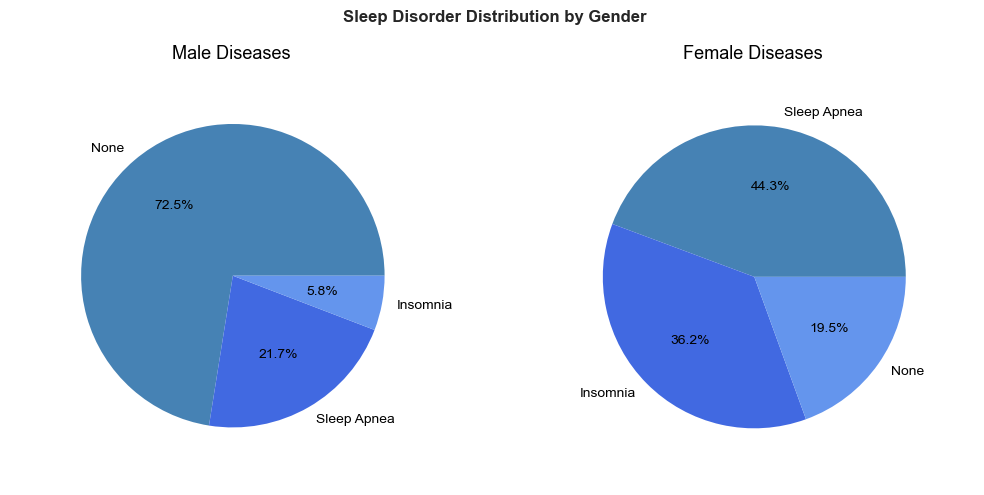

In [926]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.6)

fig.suptitle('Sleep Disorder Distribution by Gender', fontweight='bold')

ax[0].pie(df_m['Sleep Disorder'].value_counts(), labels= df_m['Sleep Disorder'].unique(), autopct='%1.1f%%', colors=colors, textprops={'color': 'black'});
ax[0].set_title('Male Diseases', fontsize=13, color='black')


ax[1].pie(df_f['Sleep Disorder'].value_counts(), labels= df_f['Sleep Disorder'].unique(), autopct='%1.1f%%', colors=colors, textprops={'color': 'black'});
ax[1].set_title('Female Diseases', fontsize=13, color='black')

ax[0].axis('equal');
ax[1].axis('equal');


plt.tight_layout()

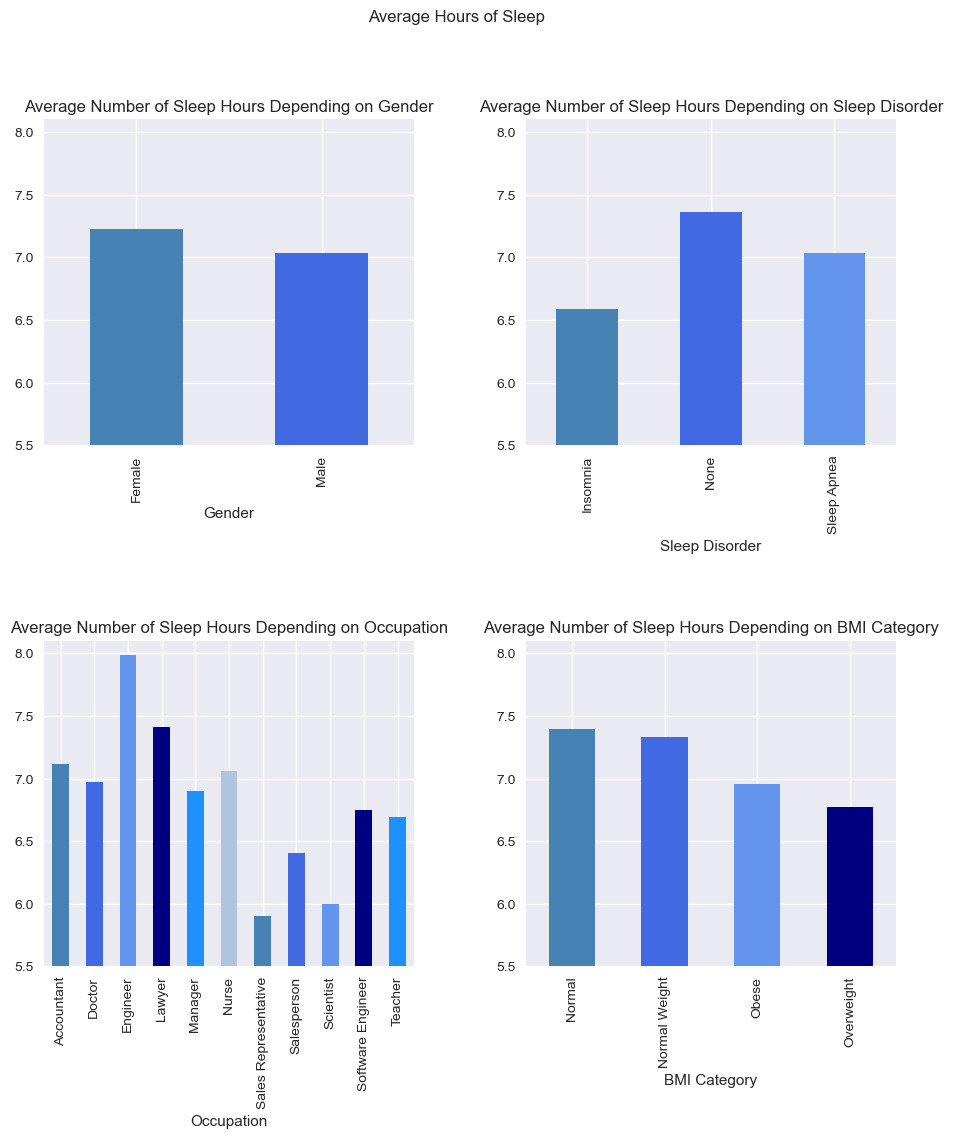

In [927]:
x = 0
y = 0


fig, ax = plt.subplots(2, 2, figsize=(11, 11))
plt.subplots_adjust(wspace=0.3, hspace=0.6)
fig.suptitle('Average Hours of Sleep')



for i in ['Gender', 'Sleep Disorder', 'Occupation', 'BMI Category']:

    df.groupby(i)['Sleep Duration'].agg('mean').plot.bar(color=colors, ax=ax[x, y])
    ax[x, y].set_ylim(5.5, 8.1)
    ax[x, y].set_title(f'Average Number of Sleep Hours Depending on {i}')

    if y < 1:
        y += 1

    else:
        x += 1
        y = 0

In [928]:
lst = ['Age', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Systolic Pressure', 'Diastolic Pressure']

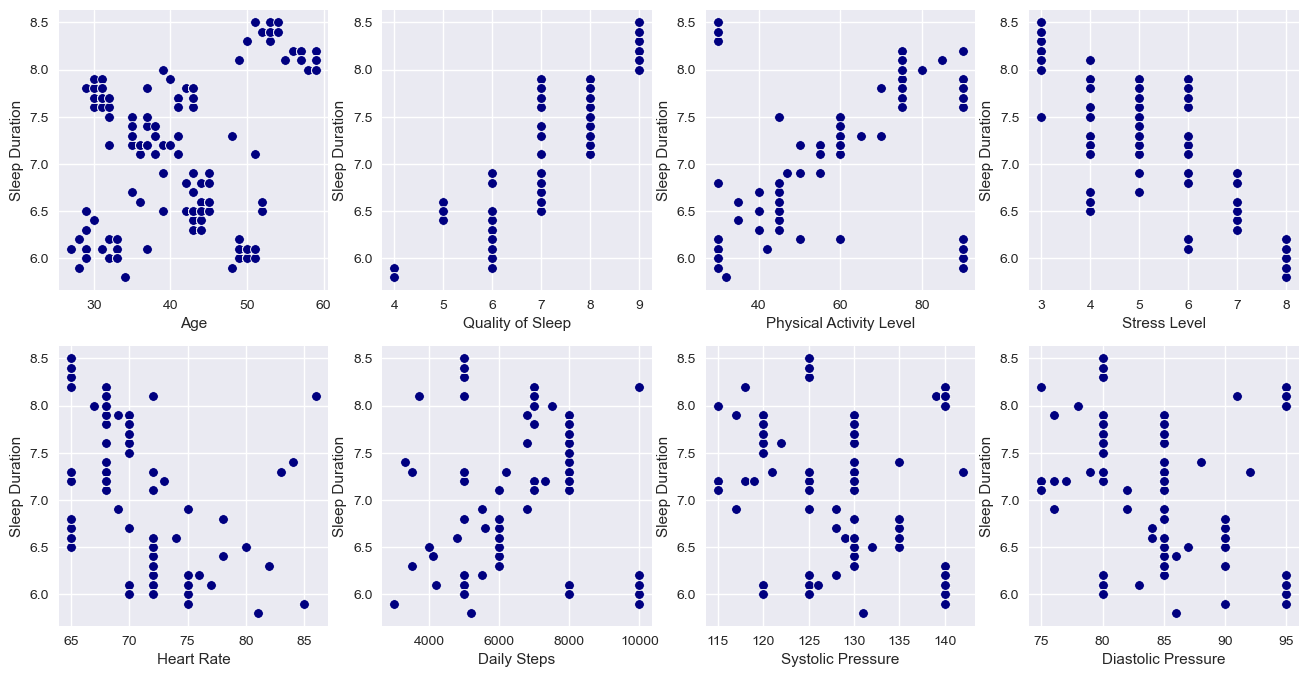

In [929]:
x, y = 0, 0

fig, ax = plt.subplots(2, 4, figsize=(16, 8))


for i in lst:
    sns.scatterplot(data=df, x=i, y='Sleep Duration', ax=ax[x, y], color='navy')

    if y < 3:
        y += 1


    else: 
        x += 1
        y = 0

In [930]:
px.box(
    x='Sleep Disorder',
      y='Quality of Sleep',
        data_frame=df,
        color='Sleep Disorder',
        color_discrete_map={'None': 'steelblue', 'Sleep Apnea': 'lightsteelblue', 'Insomnia': 'midnightblue'},
        width=800, height=500)

In [931]:
lst = [ 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps',
       'Systolic Pressure', 'Diastolic Pressure']

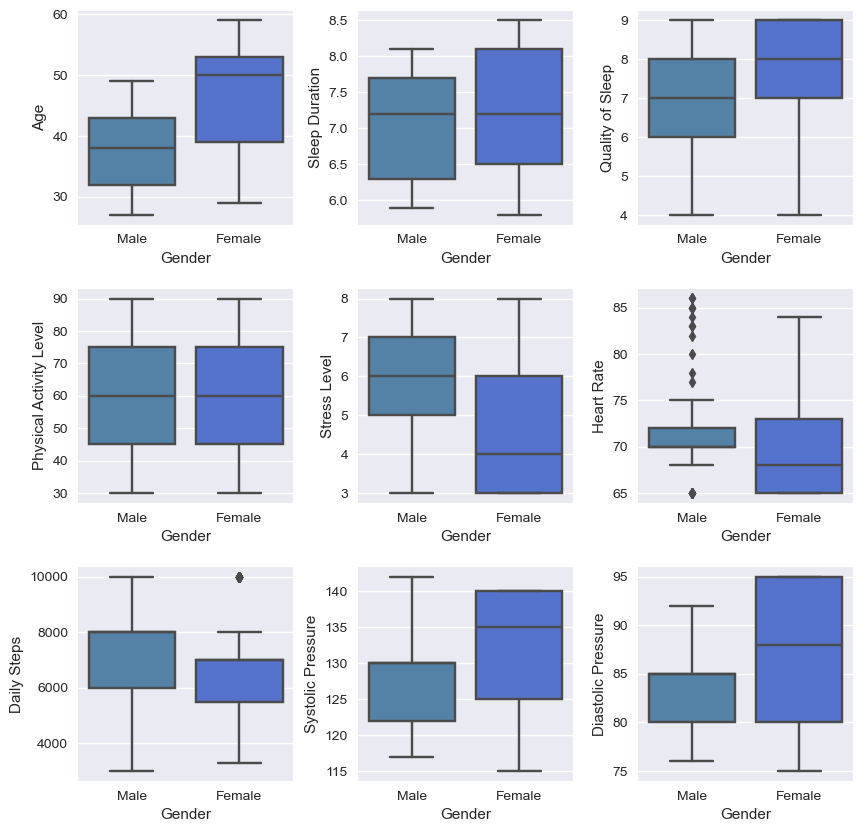

In [932]:
x, y = 0, 0

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i in lst:
    sns.boxplot(data=df,
                 x='Gender',
                   y=i,
                     ax=ax[x, y], 
                     palette=sns.color_palette(palette))

    if y < 2:
        y += 1
    
    else:
        x += 1
        y = 0

In [933]:
fig = px.treemap(df, 
                 path=['Sleep Disorder', 'Occupation'], 
                 values='Person ID',
                 title='Sleep Disorder and Occupation',
                 labels={'Person ID': 'Count'},
                 color='Quality of Sleep',
                 color_continuous_scale='Blues')

fig.update_traces(hovertemplate='<b>Occupation:</b> %{label}<br><b>Sleep Disorder:</b> %{parent}<br>')
fig.show()

In [934]:
px.line(x='Age', y='Quality of Sleep', data_frame=df.groupby('Age')['Quality of Sleep'].agg('mean').reset_index(), line_shape='linear', color_discrete_sequence=['midnightblue'])

In [935]:
px.box(
    x='Sleep Disorder',
      y='Age',
        data_frame=df,
        color='Sleep Disorder',
        color_discrete_map={'None': 'steelblue', 'Sleep Apnea': 'lightsteelblue', 'Insomnia': 'midnightblue'},
        width=800, height=500)

### *Prediction*

In [936]:
df_cl = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sleep Duration'}>,
        <AxesSubplot:title={'center':'Quality of Sleep'}>],
       [<AxesSubplot:title={'center':'Physical Activity Level'}>,
        <AxesSubplot:title={'center':'Stress Level'}>,
        <AxesSubplot:title={'center':'Heart Rate'}>],
       [<AxesSubplot:title={'center':'Daily Steps'}>,
        <AxesSubplot:title={'center':'Systolic Pressure'}>,
        <AxesSubplot:title={'center':'Diastolic Pressure'}>]],
      dtype=object)

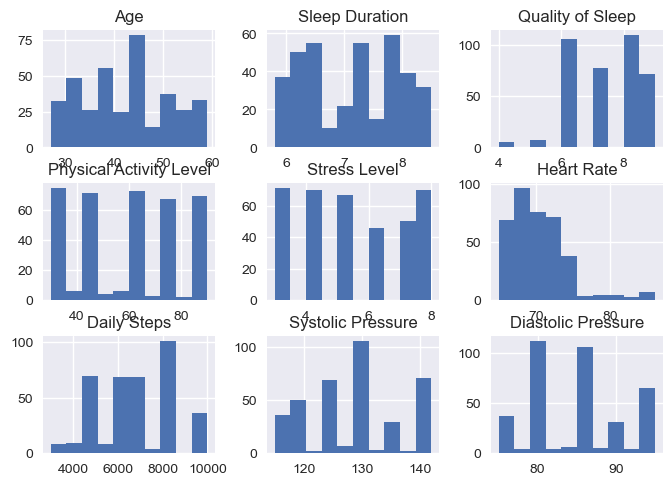

In [937]:
df.drop(columns='Person ID').hist()

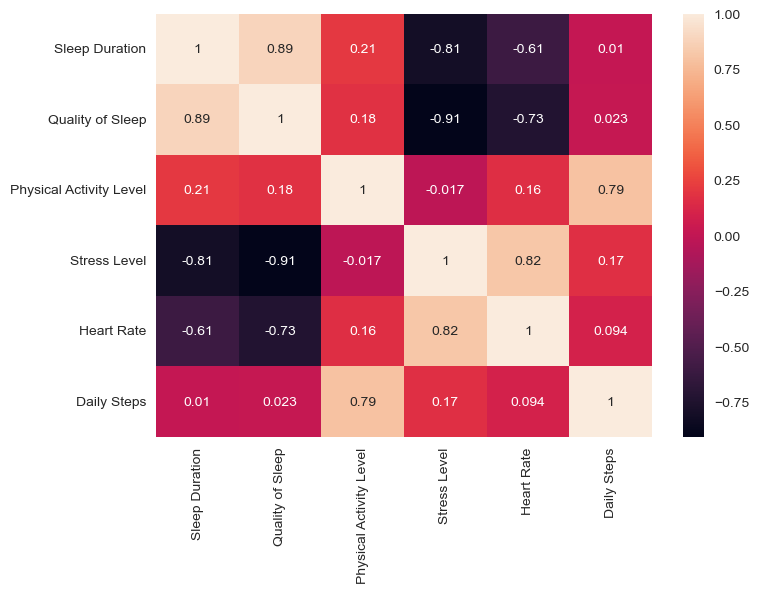

In [938]:
corr_matrix = df_cl.corr(method='spearman') 

sns.heatmap(corr_matrix, annot=True);

In [939]:
# We can see correlation Between: Sleep Duration & Stress Level, Quality of Sleep & Stress Level

In [940]:
for i in corr_matrix.columns:
    filt = (corr_matrix[i] < 0.3) & (corr_matrix[i] > - 0.3) | (corr_matrix[i] == 1)
    corr_matrix.loc[filt, i] = None

<AxesSubplot:>

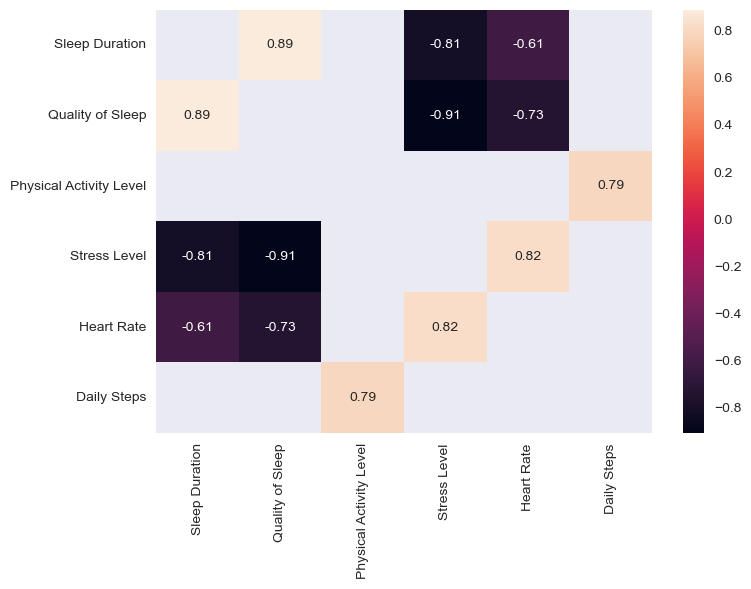

In [941]:
sns.heatmap(corr_matrix, annot=True)

In [942]:
# I removed values < 0.3 and > -0.3 to see only significant correlation values

<AxesSubplot:xlabel='Stress Level', ylabel='Quality of Sleep'>

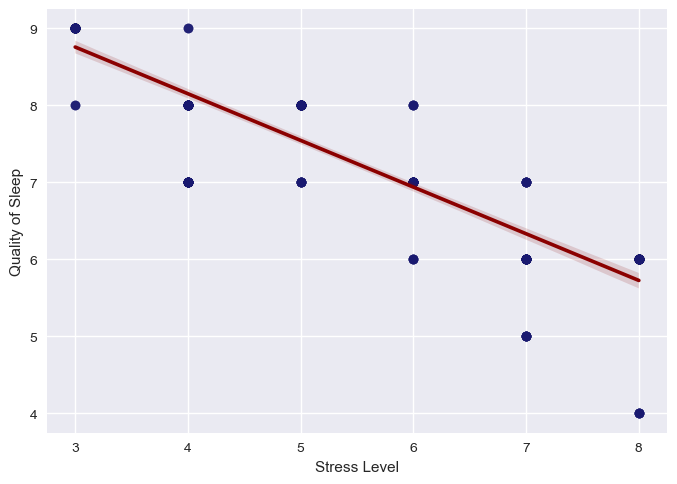

In [943]:
sns.regplot(x = 'Stress Level', y = 'Quality of Sleep', data=df, scatter_kws={'color':'midnightblue'}, line_kws={'color':'darkred'})

<AxesSubplot:xlabel='Stress Level', ylabel='Sleep Duration'>

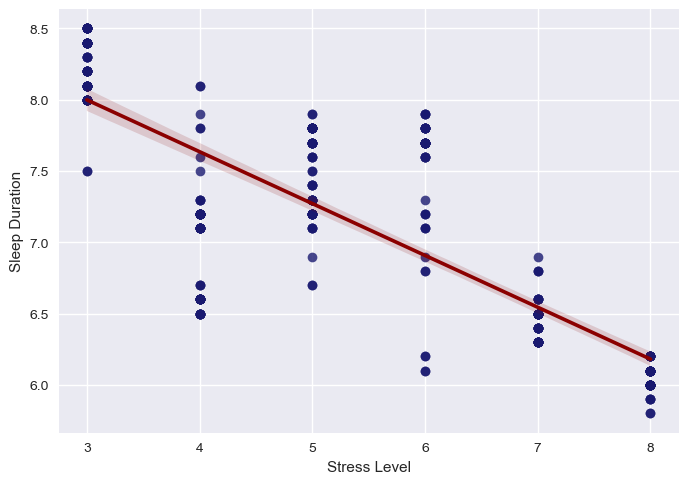

In [944]:
sns.regplot(x = 'Stress Level', y = 'Sleep Duration', data=df, scatter_kws={'color':'midnightblue'}, line_kws={'color':'darkred'})

In [945]:
model = LinearRegression()

In [946]:
X = pd.DataFrame(df['Stress Level'])
Y = pd.DataFrame(df['Sleep Duration'])

In [947]:
model.fit(X, Y)

LinearRegression()

In [948]:
model.coef_

array([[-0.36364402]])

Text(0, 0.5, 'Sleep Duration')

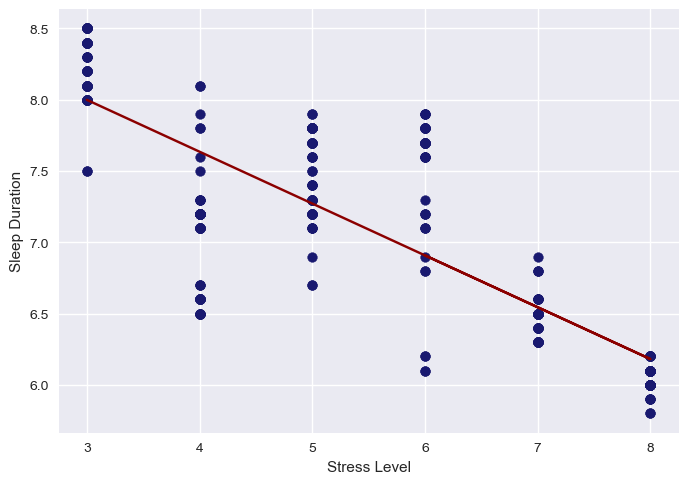

In [949]:
plt.scatter(df['Stress Level'], df['Sleep Duration'], color='midnightblue')

plt.plot(X, model.predict(X), color='Darkred')

plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')

In [950]:
model.score(X, Y)

0.6577583517744221

In [951]:
df_dummies = pd.get_dummies(df["Sleep Disorder"])
df = df.drop("Sleep Disorder", axis = 1)
df = pd.concat([df, df_dummies], axis = 1)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Insomnia,None,Sleep Apnea
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83,0,1,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,0,1,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80,0,1,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,0,0,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90,0,0,1


In [952]:
# Work With BMI
mapping = {"Normal": 1, "Normal Weight" : 1, "Overweight": 2, "Obese": 3}
df["BMI Category"] = df["BMI Category"].replace(mapping).astype(int)

<AxesSubplot:>

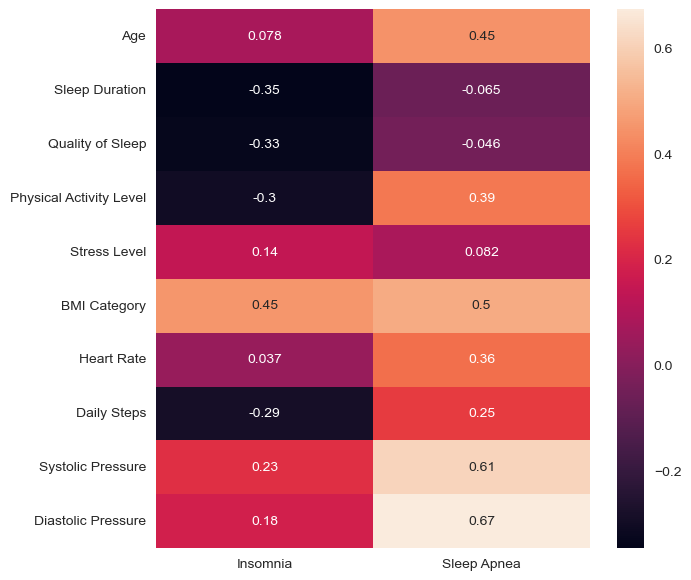

In [953]:
corr2 = df.drop(columns=['Person ID', 'None']).corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr2.iloc[:-2, -2:], annot=True)

In [954]:
# We see Correlation Between Diastolic & Systolic Pressure and Sleep Apnea

### *Summary:*

##### *By analyzing the graphs, I found many important patterns, after which I made a model for predicting sleep duration by stress level assessment.*